In [1]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from matplotlib import collections
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

In [76]:
xyz = [[float(x) for x in line.split()[5:8]] for line in open('rbd.pdb', 'r').readlines() if ' CA ' in line]

In [77]:
xy = TSNE(n_components = 2, random_state = 0, perplexity = 70).fit_transform(xyz)[:, ::-1]
xy = np.array([[x[0], x[1]] for x in xy])
node = {'ACE': xy[0:595].T, 'RBD': xy[596:790].T}

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


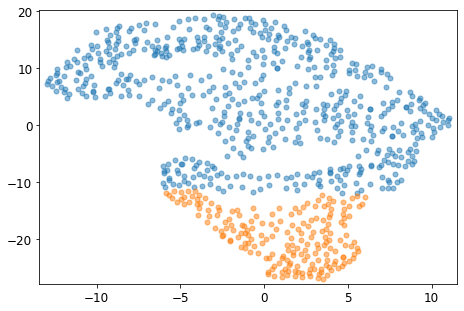

In [79]:
with plt.style.context('./matplotlibrc'):
    rcparams(plt, figsize, subplot)
    fig, ax = plt.subplots()
for c in ['ACE', 'RBD']:
    ax.scatter(*node[c], s = 25, alpha = 0.5, label = c)

In [80]:
rin = ['hb', 'vdw', 'ss', 'ion', 'pp', 'pc', 'iac', 'any']
frac = {k: np.zeros((791, 791)) for k in rin}
tmp = pd.read_table(f'rin.fraction')
for n in range(len(tmp)):
    i = tmp.at[n, 'i'] - 1
    j = tmp.at[n, 'j'] - 1
    for k in rin:
        frac[k][i][j] = tmp.at[n, k]

In [81]:
edge = []
for i, j in [[i, j] for i in range(791) for j in range(791)]: 
    tmp = {k: frac[k][i][j] for k in rin}
    tmp['pos'] = [xy[i], xy[j]]
    edge.append(tmp)

In [82]:
def rcparams(plt, figsize, subplot):
    plt.rcParams["figure.figsize"]        = figsize
    plt.rcParams["figure.subplot.left"]   = subplot['left'] / figsize[0]
    plt.rcParams["figure.subplot.right"]  = 1.00 - subplot['right'] / figsize[0]
    plt.rcParams["figure.subplot.bottom"] = subplot['bottom'] / figsize[1]
    plt.rcParams["figure.subplot.top"]    = 1.00 - subplot['top'] / figsize[1]
    plt.rcParams["figure.subplot.wspace"] = subplot['wspace'] / figsize[0]
    plt.rcParams["figure.subplot.hspace"] = subplot['hspace'] / figsize[1]
    plt.rcParams["axes.grid"] 

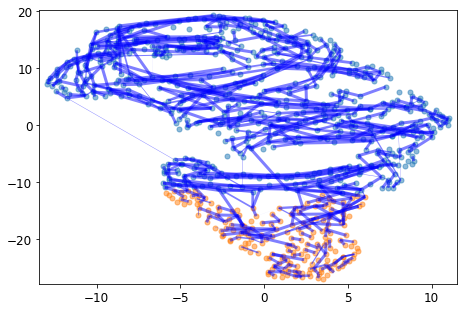

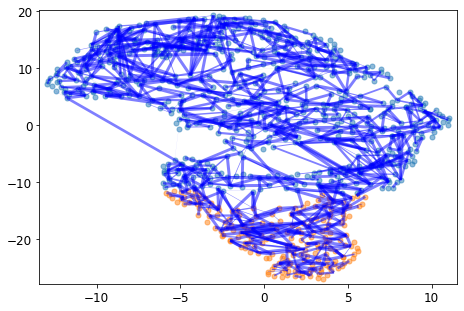

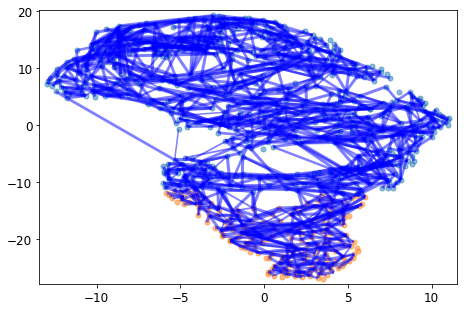

In [83]:
figsize = [6.0, 4.0]
subplot = {
    'left':   0.10,
    'right':  0.10,
    'bottom': 0.10,
    'top':    0.10,
    'wspace': 1.50,
    'hspace': 2.00,
    'grid': True,
          }

line = {}
threshold = 0.5
e = [x for x in edge if abs(x['any']) > threshold]
pos = [x['pos'] for x in e]
line = {}
for k in rin:
    val = np.array([abs(x[k]) for x in e])
    col = ['b' if x[k] > 0.0 else 'r' for x in e]
    line[k] = collections.LineCollection(pos, linewidths = val * 3.0, colors = col, alpha = 0.5)

for t in ['hb', 'vdw', 'any']:
    with plt.style.context('./matplotlibrc'):
        rcparams(plt, figsize, subplot)
        fig, ax = plt.subplots()
    for c in ['ACE', 'RBD']:
        ax.scatter(*node[c], s = 25, alpha = 0.5, label = c)
    ax.add_collection(line[t])